In [426]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import cv2
from skimage.feature import hog
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features 
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

def color_hist2(img, nbins=32):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

def extract_features2(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist2()
            hist_features = color_hist2(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))

#     # UDACITY Compute the number of windows in x/y
#     nx_windows = np.int(xspan/nx_pix_per_step) - 1
#     ny_windows = np.int(yspan/ny_pix_per_step) - 1
    
    # KENNY Compute the number of windows in x/y
    # I think more correctly that actually keeps it in bounds
    nx_windows = np.int(1 + (xspan - xy_window[0])/nx_pix_per_step)
    ny_windows = np.int(1 + (yspan - xy_window[1])/ny_pix_per_step)
    
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

def get_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    bboxes = []
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        bboxes.append(bbox)
    # Return the bounding boxes
    return bboxes

In [428]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.model_selection import train_test_split

# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

def single_img_features2(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist2(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows


def search_windows2(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features2(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows

In [297]:
cars = glob.glob('vehicles/**/*.png')
notcars = glob.glob('non-vehicles/**/*.png')
print(len(cars),len(notcars))

8792 8968


In [298]:
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

sample_size = 8000
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]

print(len(cars),len(notcars))

car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

X = np.vstack((car_features, notcar_features)).astype(np.float64)                        

"""
Should in order:
- create y
- split X and y into training/test
- calculate scaler on X_train
- apply scaler to X both X_train and X_test
"""
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=rand_state)
X_scaler = StandardScaler().fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

# # Fit a per-column scaler
# X_scaler = StandardScaler().fit(X)
# # Apply the scaler to X
# scaled_X = X_scaler.transform(X)

# # Define the labels vector
# y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# # Split up data into randomized training and test sets
# rand_state = np.random.randint(0, 100)
# X_train, X_test, y_train, y_test = train_test_split(
#     scaled_X, y, test_size=0.3, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

8000 8000
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 8460
8.66 Seconds to train SVC...
Test Accuracy of SVC =  0.9908


In [429]:
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

sample_size = 8000
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]

print(len(cars),len(notcars))

car_features = extract_features2(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features2(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

X = np.vstack((car_features, notcar_features)).astype(np.float64)                        

"""
Should in order:
- create y
- split X and y into training/test
- calculate scaler on X_train
- apply scaler to X both X_train and X_test
"""
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=rand_state)
X_scaler = StandardScaler().fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

# # Fit a per-column scaler
# X_scaler = StandardScaler().fit(X)
# # Apply the scaler to X
# scaled_X = X_scaler.transform(X)

# # Define the labels vector
# y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# # Split up data into randomized training and test sets
# rand_state = np.random.randint(0, 100)
# X_train, X_test, y_train, y_test = train_test_split(
#     scaled_X, y, test_size=0.3, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc2 = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc2.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

8000 8000
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 8460
9.78 Seconds to train SVC...
Test Accuracy of SVC =  0.9969


In [431]:
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
    
    # Return updated heatmap
    return heatmap
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

In [329]:
from collections import deque
from scipy.ndimage.measurements import label

class Pipeline4():
    """
    treates all window sizes together
    """
    def __init__(self,xy_windows=[],
                 xy_overlap=(0.5, 0.5),
                 heat_frames=7,
                 heat_threshold=6):
        self.recent_heatmaps = None
        self.heatmap = None
        self.xy_windows = xy_windows
        self.xy_overlap = xy_overlap
        self.heat_frames = heat_frames
        self.heat_threshold = heat_threshold
    def process_frame(self,image):
        if self.heatmap == None:
            # initialize heatmap and recent heatmaps
            self.heatmap = np.zeros_like(image[:,:,0])
            self.recent_heatmaps = deque([])
            for i in range(self.heat_frames):
                self.recent_heatmaps.append(self.heatmap)
        
        draw_image = np.copy(image)
        image = image.astype(np.float32)/255
        
        # collect windows that classify a car over different window sizes
        all_hot_windows = []
        for xy_window in self.xy_windows:
            # 400 is top of the cars which is pretty constant (at least for cars of a certain size...)
            # xy_window[1] is the window height. Search just over a band.
            y_start = 400
            y_start_stop = [y_start, y_start + xy_window[1]]
#             y_start_stop = [400, None]
            windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                                xy_window=xy_window, xy_overlap=self.xy_overlap)

            hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                                    spatial_size=spatial_size, hist_bins=hist_bins, 
                                    orient=orient, pix_per_cell=pix_per_cell, 
                                    cell_per_block=cell_per_block, 
                                    hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                    hist_feat=hist_feat, hog_feat=hog_feat)
            all_hot_windows += hot_windows
        
        #create heatmap of zeros
        new_heatmap = np.zeros_like(self.heatmap)
        #add heat based on current frame
        add_heat(new_heatmap, all_hot_windows)
        #update sliding collection of heatmaps by appending to right and popping left
        self.recent_heatmaps.append(new_heatmap)
        self.recent_heatmaps.popleft()
        self.heatmap = np.sum(self.recent_heatmaps,axis=0)
        self.heatmap = apply_threshold(self.heatmap, threshold=self.heat_threshold)
        
        self.all_hot_windows = all_hot_windows
        
        labels = label(self.heatmap)
        draw_img = draw_labeled_bboxes(draw_image, labels)
        return draw_img

In [330]:
from collections import deque
from scipy.ndimage.measurements import label

class Pipeline2():
    """
    treats all window sizes separately
    """
    def __init__(self,xy_windows=[],
                 xy_overlap=(0.5, 0.5),
                 heat_frames=7,
                 heat_threshold=6):
        self.recent_heatmaps = []
        self.xy_windows = xy_windows
        self.xy_overlap = xy_overlap
        self.heat_frames = heat_frames
        self.heat_threshold = heat_threshold
    def process_frame(self,image):
        
        draw_image = np.copy(image)
        image = image.astype(np.float32)/255
        
        for i, xy_window in enumerate(self.xy_windows):
            # For each window, add a FIFO queue to recent_heatmaps for history for that window size
            self.recent_heatmaps.append(deque([]))
            # Initialize if this is the first frame for this window size
            if not self.recent_heatmaps[i]:
                zeros_like_image = np.zeros_like(image[:,:,0])
                for j in range(self.heat_frames):
                    self.recent_heatmaps[i].append(zeros_like_image)
            
            # 400 is top of the cars which is pretty constant (at least for cars of a certain size...)
            # xy_window[1] is the window height. Search just over a band.
            y_start = 400
            y_start_stop = [y_start, y_start + xy_window[1]]

            windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                                xy_window=xy_window, xy_overlap=self.xy_overlap)

            hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                                    spatial_size=spatial_size, hist_bins=hist_bins, 
                                    orient=orient, pix_per_cell=pix_per_cell, 
                                    cell_per_block=cell_per_block, 
                                    hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                    hist_feat=hist_feat, hog_feat=hog_feat)
            #create heatmap of zeros
            new_heatmap = np.zeros_like(image[:,:,0])
            #add heat based on current frame
            add_heat(new_heatmap, hot_windows)
            #update sliding collection of heatmaps by appending to right and popping left
            self.recent_heatmaps[i].append(new_heatmap)
            self.recent_heatmaps[i].popleft()
            #sum the recent heatmaps and keep areas above thresholds
            heatmap = np.sum(self.recent_heatmaps[i],axis=0)
            heatmap = apply_threshold(heatmap, threshold=self.heat_threshold)
            labels = label(heatmap)
            draw_img = draw_labeled_bboxes(draw_image, labels)
        return draw_img

In [331]:
from collections import deque
from scipy.ndimage.measurements import label

class Pipeline3():
    """
    finds hot windows with window sizes separately but combines heatmaps
    """
    def __init__(self,xy_windows=[],
                 xy_overlap=(0.5, 0.5),
                 heat_frames=7,
                 heat_threshold=6):
        self.recent_heatmaps = []
        self.xy_windows = xy_windows
        self.xy_overlap = xy_overlap
        self.heat_frames = heat_frames
        self.heat_threshold = heat_threshold
    def process_frame(self,image):
        
        draw_image = np.copy(image)
        image = image.astype(np.float32)/255
        list_heatmaps = []
        for i, xy_window in enumerate(self.xy_windows):
            # For each window, add a FIFO queue to recent_heatmaps for history for that window size
            self.recent_heatmaps.append(deque([]))
            # Initialize if this is the first frame for this window size
            if not self.recent_heatmaps[i]:
                zeros_like_image = np.zeros_like(image[:,:,0])
                for j in range(self.heat_frames):
                    self.recent_heatmaps[i].append(zeros_like_image)
            
            # 400 is top of the cars which is pretty constant (at least for cars of a certain size...)
            # xy_window[1] is the window height. Search just over a band.
            y_start = 400
            y_start_stop = [y_start, y_start + xy_window[1]]

            windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                                xy_window=xy_window, xy_overlap=self.xy_overlap)

            hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                                    spatial_size=spatial_size, hist_bins=hist_bins, 
                                    orient=orient, pix_per_cell=pix_per_cell, 
                                    cell_per_block=cell_per_block, 
                                    hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                    hist_feat=hist_feat, hog_feat=hog_feat)
            #create heatmap of zeros
            new_heatmap = np.zeros_like(image[:,:,0])
            #add heat based on current frame
            add_heat(new_heatmap, hot_windows)
            #update sliding collection of heatmaps by appending to right and popping left
            self.recent_heatmaps[i].append(new_heatmap)
            self.recent_heatmaps[i].popleft()
            #sum the recent heatmaps and keep areas above thresholds
            heatmap = np.sum(self.recent_heatmaps[i],axis=0)
            heatmap = apply_threshold(heatmap, threshold=self.heat_threshold)
            list_heatmaps.append(heatmap)

        # combine the list of labels into one image with the overlap of all labels
        combined_heatmap = np.zeros_like(image[:,:,0])
        for heatmap in list_heatmaps:
            combined_heatmap[heatmap != 0] = 1
        labels = label(combined_heatmap)
        draw_img = draw_labeled_bboxes(draw_image, labels)
        return draw_img

In [362]:
from collections import deque
from scipy.ndimage.measurements import label

class Pipeline():
    """
    treats all window sizes together
    turns each frame's heatmap into a binary so threshold is only over frames
    """
    def __init__(self,xy_windows=[],
                 xy_overlap=(0.5, 0.5),
                 heat_frames=7,
                 heat_threshold=6):
        self.recent_heatmaps = None
        self.heatmap = None
        self.xy_windows = xy_windows
        self.xy_overlap = xy_overlap
        self.heat_frames = heat_frames
        self.heat_threshold = heat_threshold
    def process_frame(self,image):
        if self.heatmap == None:
            # initialize heatmap and recent heatmaps
            self.heatmap = np.zeros_like(image[:,:,0])
            self.recent_heatmaps = deque([])
            for i in range(self.heat_frames):
                self.recent_heatmaps.append(self.heatmap)
        
        draw_image = np.copy(image)
        image = image.astype(np.float32)/255
        
        # collect windows that classify a car over different window sizes
        all_hot_windows = []
        for xy_window in self.xy_windows:
            # 400 is top of the cars which is pretty constant (at least for cars of a certain size...)
            # xy_window[1] is the window height. Search just over a band.
            y_start = 400
            y_start_stop = [y_start, y_start + xy_window[1]]
#             y_start_stop = [400, None]
            windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                                xy_window=xy_window, xy_overlap=self.xy_overlap)

            hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                                    spatial_size=spatial_size, hist_bins=hist_bins, 
                                    orient=orient, pix_per_cell=pix_per_cell, 
                                    cell_per_block=cell_per_block, 
                                    hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                    hist_feat=hist_feat, hog_feat=hog_feat)
            all_hot_windows += hot_windows
        #create heatmap of zeros
        new_heatmap = np.zeros_like(self.heatmap)
        #add heat based on current frame
        add_heat(new_heatmap, all_hot_windows)
        #make binary heatmap for current frame
        new_heatmap_binary = np.zeros_like(self.heatmap)
        new_heatmap_binary[new_heatmap >= 1] = 1
        #update sliding collection of heatmaps by appending to right and popping left
        self.recent_heatmaps.append(new_heatmap_binary)
        self.recent_heatmaps.popleft()
        self.heatmap = np.sum(self.recent_heatmaps,axis=0)
        self.heatmap = apply_threshold(self.heatmap, threshold=self.heat_threshold)
        
        self.all_hot_windows = all_hot_windows
        
        labels = label(self.heatmap)
        
#         draw_img = draw_labeled_bboxes(draw_image, labels) # trying something new

        bboxes = get_labeled_bboxes(draw_image, labels)
        for bbox in bboxes:
            cv2.rectangle(draw_image, bbox[0], bbox[1], (0,0,255), 6)
#         return draw_img
        return draw_image

In [432]:
from collections import deque
from scipy.ndimage.measurements import label

class Pipeline5():
    """
    treats all window sizes together
    turns each frame's heatmap into a binary so threshold is only over frames
    """
    def __init__(self,xy_windows=[],
                 xy_overlap=(0.5, 0.5),
                 heat_frames=7,
                 heat_threshold=6):
        self.recent_heatmaps = None
        self.heatmap = None
        self.xy_windows = xy_windows
        self.xy_overlap = xy_overlap
        self.heat_frames = heat_frames
        self.heat_threshold = heat_threshold
    def process_frame(self,image):
        if self.heatmap == None:
            # initialize heatmap and recent heatmaps
            self.heatmap = np.zeros_like(image[:,:,0])
            self.recent_heatmaps = deque([])
            for i in range(self.heat_frames):
                self.recent_heatmaps.append(self.heatmap)
        
        draw_image = np.copy(image)
        image = image.astype(np.float32)/255
        
        # collect windows that classify a car over different window sizes
        all_hot_windows = []
        for xy_window in self.xy_windows:
            # 400 is top of the cars which is pretty constant (at least for cars of a certain size...)
            # xy_window[1] is the window height. Search just over a band.
            y_start = 400
            y_start_stop = [y_start, y_start + xy_window[1]]
#             y_start_stop = [400, None]
            windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                                xy_window=xy_window, xy_overlap=self.xy_overlap)

            hot_windows = search_windows(image, windows, svc2, X_scaler, color_space=color_space, 
                                    spatial_size=spatial_size, hist_bins=hist_bins, 
                                    orient=orient, pix_per_cell=pix_per_cell, 
                                    cell_per_block=cell_per_block, 
                                    hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                    hist_feat=hist_feat, hog_feat=hog_feat)
            all_hot_windows += hot_windows
        #create heatmap of zeros
        new_heatmap = np.zeros_like(self.heatmap)
        #add heat based on current frame
        add_heat(new_heatmap, all_hot_windows)
        #make binary heatmap for current frame
        new_heatmap_binary = np.zeros_like(self.heatmap)
        new_heatmap_binary[new_heatmap >= 1] = 1
        #update sliding collection of heatmaps by appending to right and popping left
        self.recent_heatmaps.append(new_heatmap_binary)
        self.recent_heatmaps.popleft()
        self.heatmap = np.sum(self.recent_heatmaps,axis=0)
        self.heatmap = apply_threshold(self.heatmap, threshold=self.heat_threshold)
        
        self.all_hot_windows = all_hot_windows
        
        labels = label(self.heatmap)
        
#         draw_img = draw_labeled_bboxes(draw_image, labels) # trying something new

        bboxes = get_labeled_bboxes(draw_image, labels)
        for bbox in bboxes:
            cv2.rectangle(draw_image, bbox[0], bbox[1], (0,0,255), 6)
#         return draw_img
        return draw_image

In [451]:
from moviepy.editor import VideoFileClip
# 72,96,128,160,196
# xy_windows = [(75,75),(100,100),(125,125),(150,150),(200,200)]
def process_movie(fname, output_fname):
    clip = VideoFileClip(fname)
    pipeline = Pipeline5(xy_windows = [(72,72),(96,96),(128,128),(160,160),(196,196)],
                        xy_overlap=(0.75, 0.75),
                        heat_frames=7, #7
                        heat_threshold=6) #4
    clip_output = clip.fl_image(pipeline.process_frame)
    %time clip_output.write_videofile(output_fname, audio=False, codec='mpeg4')

In [456]:
# test6 test20 test39 test43 test_video_2 project_video
moviename = 'project_video'
fname = moviename + '.mp4'
output_fname = moviename + '_output.mp4'
process_movie(fname,output_fname)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4







  0%|          | 0/1261 [00:00<?, ?it/s]




  0%|          | 1/1261 [00:01<23:30,  1.12s/it]




  0%|          | 2/1261 [00:02<24:19,  1.16s/it]




  0%|          | 3/1261 [00:03<23:39,  1.13s/it]




  0%|          | 4/1261 [00:04<22:16,  1.06s/it]




  0%|          | 5/1261 [00:05<21:22,  1.02s/it]




  0%|          | 6/1261 [00:06<20:42,  1.01it/s]




  1%|          | 7/1261 [00:07<20:08,  1.04it/s]




  1%|          | 8/1261 [00:07<19:42,  1.06it/s]




  1%|          | 9/1261 [00:08<19:22,  1.08it/s]




  1%|          | 10/1261 [00:09<19:11,  1.09it/s]




  1%|          | 11/1261 [00:10<19:45,  1.05it/s]




  1%|          | 12/1261 [00:11<19:35,  1.06it/s]




  1%|          | 13/1261 [00:12<19:31,  1.06it/s]




  1%|          | 14/1261 [00:13<19:34,  1.06it/s]




  1%|          | 15/1261 [00:14<19:22,  1.07it/s]




  1%|▏         | 16/1261 [00:15<19:12,  1.08it/s]




  1%|▏         | 17/1261 [00:16<19:04,  1.09it/s]




  1%|▏         | 18/1261 [00:17<18:57,  1

[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 39min 49s, sys: 1min, total: 40min 49s
Wall time: 21min 44s


In [453]:
# test6 test20 test39 test43 test_video_2 project_video
moviename = 'test20'
fname = moviename + '.mp4'
output_fname = moviename + '_output.mp4'
process_movie(fname,output_fname)

[MoviePy] >>>> Building video test20_output.mp4
[MoviePy] Writing video test20_output.mp4







  0%|          | 0/51 [00:00<?, ?it/s]




  2%|▏         | 1/51 [00:01<01:03,  1.26s/it]




  4%|▍         | 2/51 [00:02<00:58,  1.19s/it]




  6%|▌         | 3/51 [00:03<00:54,  1.13s/it]




  8%|▊         | 4/51 [00:04<00:51,  1.09s/it]




 10%|▉         | 5/51 [00:05<00:48,  1.05s/it]




 12%|█▏        | 6/51 [00:06<00:45,  1.02s/it]




 14%|█▎        | 7/51 [00:07<00:44,  1.00s/it]




 16%|█▌        | 8/51 [00:08<00:43,  1.01s/it]




 18%|█▊        | 9/51 [00:09<00:41,  1.00it/s]




 20%|█▉        | 10/51 [00:10<00:40,  1.01it/s]




 22%|██▏       | 11/51 [00:11<00:39,  1.01it/s]




 24%|██▎       | 12/51 [00:12<00:38,  1.01it/s]




 25%|██▌       | 13/51 [00:13<00:38,  1.00s/it]




 27%|██▋       | 14/51 [00:14<00:36,  1.01it/s]




 29%|██▉       | 15/51 [00:15<00:37,  1.05s/it]




 31%|███▏      | 16/51 [00:16<00:39,  1.12s/it]




 33%|███▎      | 17/51 [00:17<00:36,  1.07s/it]




 35%|███▌      | 18/51 [00:18<00:34,  1.04s/it]




 37%|███▋      | 19/51 [0

[MoviePy] Done.
[MoviePy] >>>> Video ready: test20_output.mp4 

CPU times: user 1min 36s, sys: 2.29 s, total: 1min 38s
Wall time: 51.9 s


In [454]:
# test6 test20 test39 test43 test_video_2 project_video
moviename = 'test39'
fname = moviename + '.mp4'
output_fname = moviename + '_output.mp4'
process_movie(fname,output_fname)

[MoviePy] >>>> Building video test39_output.mp4
[MoviePy] Writing video test39_output.mp4







  0%|          | 0/102 [00:00<?, ?it/s]




  1%|          | 1/102 [00:00<01:40,  1.00it/s]




  2%|▏         | 2/102 [00:02<01:40,  1.01s/it]




  3%|▎         | 3/102 [00:03<01:40,  1.02s/it]




  4%|▍         | 4/102 [00:04<01:41,  1.04s/it]




  5%|▍         | 5/102 [00:05<01:39,  1.02s/it]




  6%|▌         | 6/102 [00:06<01:37,  1.01s/it]




  7%|▋         | 7/102 [00:07<01:36,  1.01s/it]




  8%|▊         | 8/102 [00:08<01:34,  1.01s/it]




  9%|▉         | 9/102 [00:09<01:33,  1.00s/it]




 10%|▉         | 10/102 [00:10<01:33,  1.01s/it]




 11%|█         | 11/102 [00:11<01:32,  1.01s/it]




 12%|█▏        | 12/102 [00:12<01:31,  1.02s/it]




 13%|█▎        | 13/102 [00:13<01:29,  1.01s/it]




 14%|█▎        | 14/102 [00:14<01:28,  1.01s/it]




 15%|█▍        | 15/102 [00:15<01:27,  1.00s/it]




 16%|█▌        | 16/102 [00:16<01:26,  1.01s/it]




 17%|█▋        | 17/102 [00:17<01:27,  1.03s/it]




 18%|█▊        | 18/102 [00:18<01:32,  1.10s/it]




 19%|█

[MoviePy] Done.
[MoviePy] >>>> Video ready: test39_output.mp4 

CPU times: user 3min 8s, sys: 4.2 s, total: 3min 12s
Wall time: 1min 39s


In [455]:
# test6 test20 test39 test43 test_video_2 project_video
moviename = 'test43'
fname = moviename + '.mp4'
output_fname = moviename + '_output.mp4'
process_movie(fname,output_fname)

[MoviePy] >>>> Building video test43_output.mp4
[MoviePy] Writing video test43_output.mp4







  0%|          | 0/27 [00:00<?, ?it/s]




  4%|▎         | 1/27 [00:01<00:30,  1.17s/it]




  7%|▋         | 2/27 [00:02<00:28,  1.12s/it]




 11%|█         | 3/27 [00:03<00:25,  1.08s/it]




 15%|█▍        | 4/27 [00:04<00:24,  1.07s/it]




 19%|█▊        | 5/27 [00:05<00:23,  1.08s/it]




 22%|██▏       | 6/27 [00:06<00:23,  1.10s/it]




 26%|██▌       | 7/27 [00:07<00:21,  1.08s/it]




 30%|██▉       | 8/27 [00:08<00:20,  1.06s/it]




 33%|███▎      | 9/27 [00:09<00:19,  1.07s/it]




 37%|███▋      | 10/27 [00:10<00:19,  1.14s/it]




 41%|████      | 11/27 [00:12<00:18,  1.14s/it]




 44%|████▍     | 12/27 [00:13<00:16,  1.12s/it]




 48%|████▊     | 13/27 [00:14<00:15,  1.10s/it]




 52%|█████▏    | 14/27 [00:15<00:14,  1.10s/it]




 56%|█████▌    | 15/27 [00:16<00:12,  1.08s/it]




 59%|█████▉    | 16/27 [00:17<00:12,  1.09s/it]




 63%|██████▎   | 17/27 [00:18<00:10,  1.10s/it]




 67%|██████▋   | 18/27 [00:19<00:10,  1.11s/it]




 70%|███████   | 19/27 [0

[MoviePy] Done.
[MoviePy] >>>> Video ready: test43_output.mp4 

CPU times: user 51.6 s, sys: 1.46 s, total: 53 s
Wall time: 28.1 s


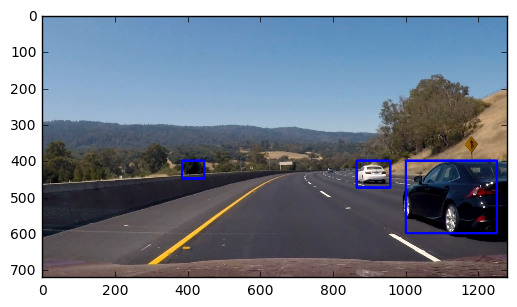

In [406]:
pipeline = Pipeline(xy_windows = [(50,50),(75,75),(100,100),(125,125),(150,150),(200,200)],
                        xy_overlap=(0.75, 0.75),
                        heat_frames=5,
                        heat_threshold=0.5)
clip0 = VideoFileClip('project_video.mp4')
image = clip0.get_frame(29*25/25)
result = pipeline.process_frame(image)
plt.imshow(result)

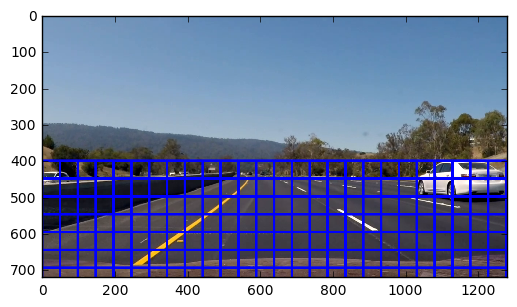

In [413]:
clip0 = VideoFileClip('project_video.mp4')
image = clip0.get_frame(10*25/25) # shape = (720,1280)

# (75,75),(100,100),(125,125),(150,150),(200,200)
# 72,96,128,160,196
window_size = 196
windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[400, 400+window_size*2], 
                                xy_window=(window_size,window_size), xy_overlap=(0.75, 0.75))
image_boxes = draw_boxes(image, windows, color=(0, 0, 255), thick=6)
plt.imshow(image_boxes)

In [381]:
# pipeline = Pipeline(xy_windows = [(50,50),(75,75),(100,100),(125,125),(150,150),(200,200)],
#                         xy_overlap=(0.75, 0.75),
#                         heat_frames=5,
#                         heat_threshold=0.5)
# image = mpimg.imread('test_images/test5.jpg')
# result = pipeline.process_frame(image)
# plt.imshow(result)